<a href="https://colab.research.google.com/github/shoulhafiz/sql-for-datascience/blob/master/SVM_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/iris.csv

--2019-11-06 01:25:37--  https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/iris.csv
Resolving malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)... 52.219.32.143
Connecting to malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)|52.219.32.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/csv]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2019-11-06 01:25:38 (262 MB/s) - ‘iris.csv’ saved [3716/3716]



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('iris.csv')

In [0]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [0]:
df.shape

(150, 5)

## Seaborn boxplot visualization

https://seaborn.pydata.org/examples/grouped_boxplot.html
# can check more style at doc, https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("white")

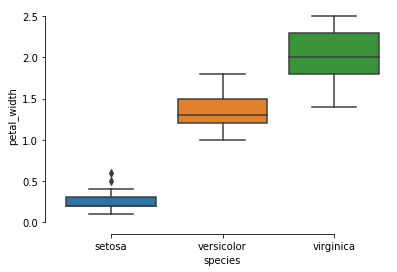

In [0]:
sns.boxplot(x='species', y='petal_width', data=df)
sns.despine(offset=10, trim=True)

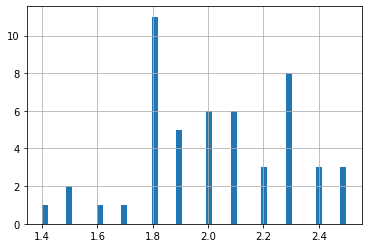

In [0]:
df[df['species'] == 'virginica']['petal_width'].hist(bins = 50,
                                                     label = 'virginica')

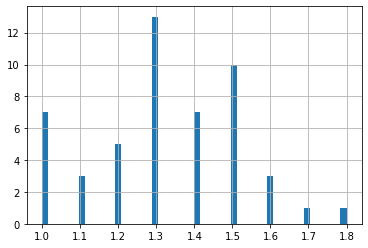

In [0]:
df[df['species'] == 'versicolor']['petal_width'].hist(bins = 50,
                                                     label = 'versicolor')

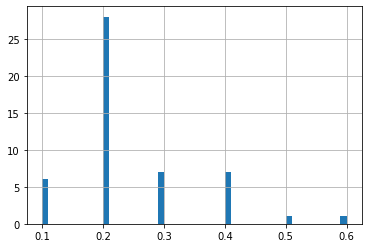

In [0]:
df[df['species'] == 'setosa']['petal_width'].hist(bins = 50,
                                                     label = 'setosa')

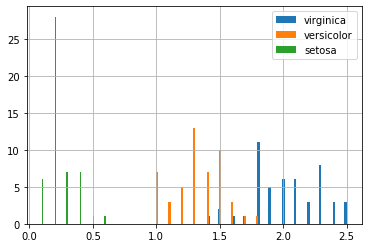

In [0]:
df[df['species'] == 'virginica']['petal_width'].hist(bins = 50,
                                                     label = 'virginica')
df[df['species'] == 'versicolor']['petal_width'].hist(bins = 50,
                                                     label = 'versicolor')
df[df['species'] == 'setosa']['petal_width'].hist(bins = 50,
                                                     label = 'setosa')
plt.legend()
plt.show()

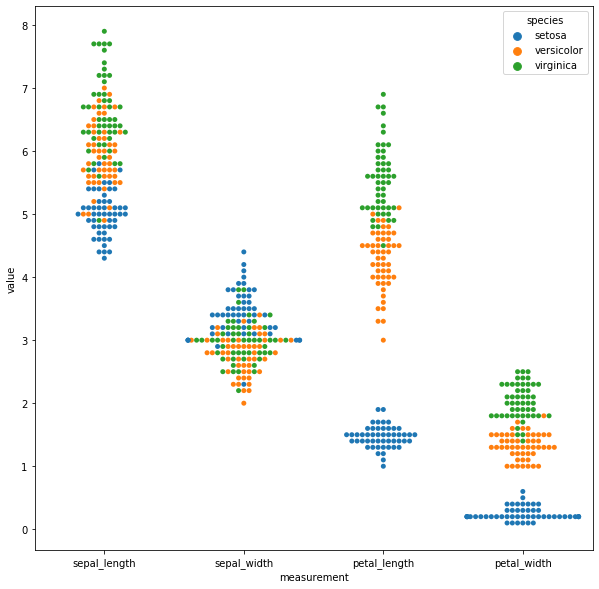

In [0]:
plt.figure(figsize=(10, 10))
iris = pd.melt(df, "species", var_name="measurement")

sns.swarmplot(x="measurement", y="value", hue="species",
              data=iris)

In [0]:
correlation = df.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


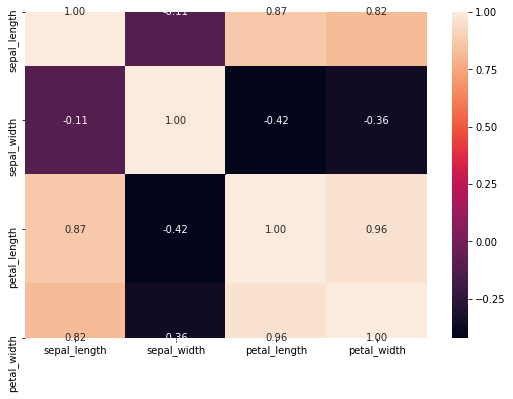

sepal_length    0.699769
sepal_width     0.471607
petal_length    0.813757
petal_width     0.784314
dtype: float64

In [0]:
plt.subplots(figsize=(9, 6))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.show()


In [0]:
correlation.abs().mean(axis=1)

sepal_length    0.699769
sepal_width     0.471607
petal_length    0.813757
petal_width     0.784314
dtype: float64

**MACHINE LEARNING**

https://scikit-learn.org/stable/
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [0]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.2)

train_X.shape, test_X.shape

((120, 4), (30, 4))

In [32]:
#%%time

#from sklearn.svm import SVC

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#svm = SVC().fit(train_X, train_Y)

CPU times: user 13.2 ms, sys: 6.48 ms, total: 19.7 ms
Wall time: 92.2 ms


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
%%time
from sklearn.svm import SVC

model = SVC()
model.fit(train_X, train_Y)

CPU times: user 2.41 ms, sys: 782 µs, total: 3.2 ms
Wall time: 3.68 ms


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
predict_Y = model.predict(test_X)
predict_Y

array(['virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa'], dtype=object)

In [37]:
test_Y, predict_Y

(array(['virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
        'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
        'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
        'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
        'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
        'virginica', 'setosa', 'setosa'], dtype=object),
 array(['virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
        'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
        'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
        'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
        'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
        'virginica', 'setosa', 'setosa'], dtype=object))

In [38]:
from sklearn import metrics

print(
    metrics.classification_report(
        test_Y, predict_Y,
        digits = 5
    )
)

              precision    recall  f1-score   support

      setosa    1.00000   1.00000   1.00000        14
  versicolor    1.00000   1.00000   1.00000         5
   virginica    1.00000   1.00000   1.00000        11

    accuracy                        1.00000        30
   macro avg    1.00000   1.00000   1.00000        30
weighted avg    1.00000   1.00000   1.00000        30



In [40]:
metrics.confusion_matrix(test_Y, predict_Y)

array([[14,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 11]])

In [41]:
metrics.accuracy_score(test_Y, predict_Y)

1.0

In [0]:
#Save the model
import pickle

with open('svm_iris.pkl', 'wb') as fopen:
  pickle.dump(model, fopen)


In [45]:
#Callback the model

# assume this is new machine

with open('svm_iris.pkl', 'rb') as fopen:
  new_svm = pickle.load(fopen)

new_svm.predict(df.iloc[:10, :-1])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)